In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xgboost==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157.5 MB 60 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import joblib
import warnings
warnings.filterwarnings("ignore")


def load_model(path=''):
  return joblib.load(path)

In [ ]:
lr_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/lr_file_hash.pkl")
pac_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/pac_file_hash.pkl")
dt_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/dt_file_hash.pkl")
gb_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/gb_file_hash.pkl")
adb_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/adb_file_hash.pkl")
xgb_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/xgb_file_hash.pkl")
lgbm_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/lgbm_file_hash.pkl")
voting_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/vt_file_hash.pkl")

In [ ]:
!pip install bnlp-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 56.6 MB/s 
     |████████████████████████████████| 965 kB 57.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
import re
from bnlp.corpus import stopwords
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

%matplotlib inline
sns.set()

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
label_auth=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledAuthentic-7K.csv') #, nrows=3067)
label_fake=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledFake-1K.csv') #, nrows=995)
label_auth.drop(['source','relation'], axis=1, inplace=True)
label_fake.drop(['source','relation','F-type'], axis=1, inplace=True)
df=pd.concat([label_auth, label_fake], axis=0)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df['label']=np.where(df['label']==0.0, 0, 1)
df.tail()
df=df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(8501, 7)


,articleID,domain,date,category,headline,content,label
0,5408,channelionline.com,2018-09-20 18:37:15,Sports,ম্যানইউ’র বিপক্ষে খেলতে পারবেন রোনালদো?,জুভেন্টাসের জার্সিতে চ্যাম্পিয়ন্স লিগে মৌসুমে ...,1
1,7196,banglatribune.com,2018-10-05 20:14:56,National,যৌতুকের নির্যাতন সইতে না পেরে নববধূর আত্মহত্যা,প্রেমের সম্পর্ক অভিভাবক মেনে না নেওয়ায় প্রেমিক...,1
2,2424,bangla.thereport24.com,2018-09-22 18:29:35,National,বাংলাদেশের জন্য অবাধ ও নিরপেক্ষ নির্বাচন গুরুত...,দ্য রিপোর্ট প্রতিবেদক: যুক্তরাষ্ট্রের রাষ্ট্রদ...,1
3,3327,dailynayadiganta.com,2018-09-22 13:38:28,Politics,কোনো জোট করে লাভ নেই : নাসিম,আওয়ামী লীগের প্রেসিডিয়াম সদস্য এবং স্বাস্থ্যমন...,1
4,487,bengalbeats.com,2019-04-21T14:17:32+00:00,Miscellaneous,ওয়াসার ১০০% সুপেয় পানি গোপনে ফুটিয়ে খাওয়ার দায়...,ওয়াসার শতভাগ সুপেয় পানি আবারো নতুন করে সুপেয় ক...,0


In [ ]:
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=x.split()
        x=[w for w in x if w not in set(stopwords)]
        x=' '.join(x)
        corpus.append(x)
    
    return corpus


corpus=preprocess(df)
corpus[16:20]

['গত আগস্ট হঠাৎ নিয়ন্ত্রক সংস্থা বিটিআরসি প্রজ্ঞাপন জারী গ্রাহকদের ম্যাসেজের ভয়েস কলরেটে অন নেট অফ নেট থাকছে রেট পূর্বের ফ্লোর রেট পয়সার স্থলে পয়সা সর্বোচ্চ সিলিং রেট টাকা হঠাৎ কল রেট বাড়ানোর কারণে প্রতিবাদ জানিয়েছে বাংলাদেশ মুঠোফোন গ্রাহক এসোসিয়েশন বুধবার সেপ্টেম্বরা জাতীয় প্রেসক্লাবের মুক্ত সংবাদ সম্মেলনের আয়োজন ভয়েস কলরেট বৃদ্ধির প্রতিবাদ বৃদ্ধির ব্যাখ্যা দাবিতে মানবন্ধন বাংলাদেশ মুঠোফোন গ্রাহক এসোসিয়েশন মানবন্ধনের সংগঠনটি ভয়েস কলরেট কমাতে দফা প্রস্তাবনা দিয়েছে বিষয়টি মুঠোফোন গ্রাহক এসোসিয়েশনের সভাপতি মহিউদ্দীন আহমেদ বাংলাদেশে সর্বপ্রথম সালে আন্তর্জাতিক টেলিযোগাযোগ ইউনিয়নের আইইটিইউ সহায়তায় বিটিআরসি ভয়েস কলের সর্বোচ্চ সর্বনিম্ন রেট বেঁধে দেয় যুক্তি দিয়ে কল রেট বাড়ানো হয়েছে হাস্যকর উল্লেখ মহিউদ্দীন আহমেদ যুক্তি অত্যন্ত হাস্যকর প্রথমত মনোপলি ভাঙ্গার নিয়ন্ত্রক সংস্থার এজন্য দেশে প্রতিযোগিতা কমিশন রয়েছে আইনও কাগজে কলমে সময় নিয়ন্ত্রক সংস্থা কস্ট মডেলিংও করেছিল গত আগস্ট হঠাৎ নিয়ন্ত্রক সংস্থা বিটিআরসি প্রজ্ঞাপন জারী গ্রাহকদের ম্যাসেজের ভয়েস কলরেটে অন নেট অফ নেট থাকছে রেট পূর্বের ফ্লোর রেট 

In [ ]:
hashing=HashingVectorizer(n_features=5000, ngram_range=(1, 3))
X=hashing.fit_transform(corpus).toarray()
y=df['label'].values
X.shape, y.shape

((8501, 5000), (8501,))

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
lr_pred=lr_model.predict(X)
pac_pred=pac_model.predict(X)
dt_pred=dt_model.predict(X)
gb_pred=gb_model.predict(X)
adb_pred=adb_model.predict(X)
xgb_pred=xgb_model.predict(X)
lgbm_pred=lgbm_model.predict(X)
voting_pred=voting_model.predict(X)

In [ ]:
print(f'Actual Outcomes ---> {y[:10]}')
print(f'Prediction Outcomes in Logistic Regression Model ---> {lr_pred[:10]}')
print(f'Prediction Outcomes in Passive Aggressive Classifier Model ---> {pac_pred[:10]}')
print(f'Prediction Outcomes in Decision Tree Model ---> {dt_pred[:10]}')
print(f'Prediction Outcomes in Gradient Boosting Model ---> {gb_pred[:10]}')
print(f'Prediction Outcomes in Adaptive Gradient Boosting Model ---> {adb_pred[:10]}')
print(f'Prediction Outcomes in Extreme Gradient Boosting Model ---> {xgb_pred[:10]}')
print(f'Prediction Outcomes in Light Gradient Boosted Machine Model ---> {lgbm_pred[:10]}')
print(f'Prediction Outcomes in Voting Classifier(lr+pac+dt+light) Model ---> {voting_pred[:10]}')

Actual Outcomes ---> [1 1 1 1 0 0 1 1 1 1]
Prediction Outcomes in Logistic Regression Model ---> [1 1 1 1 0 0 1 1 1 1]
Prediction Outcomes in Passive Aggressive Classifier Model ---> [1 1 1 1 0 0 1 1 1 1]
Prediction Outcomes in Decision Tree Model ---> [1 1 1 1 1 0 0 1 1 1]
Prediction Outcomes in Gradient Boosting Model ---> [1 1 1 1 0 1 1 1 1 1]
Prediction Outcomes in Adaptive Gradient Boosting Model ---> [1 1 1 1 0 1 1 1 1 1]
Prediction Outcomes in Extreme Gradient Boosting Model ---> [1 1 1 1 0 0 1 1 1 1]
Prediction Outcomes in Light Gradient Boosted Machine Model ---> [1 1 1 1 0 0 1 1 1 1]
Prediction Outcomes in Voting Classifier(lr+pac+dt+light) Model ---> [1 1 1 1 0 0 1 1 1 1]


In [ ]:
def model_accuracy(pred):
  return accuracy_score(y, pred)

lr_accuracy=model_accuracy(lr_pred).round(2)
pac_accuracy=model_accuracy(pac_pred).round(2)
dt_accuracy=model_accuracy(dt_pred).round(2)
gb_accuracy=model_accuracy(gb_pred).round(2)
adb_accuracy=model_accuracy(adb_pred).round(2)
xgb_accuracy=model_accuracy(xgb_pred).round(2)
lgbm_accuracy=model_accuracy(lgbm_pred).round(2)
voting_accuracy=model_accuracy(voting_pred).round(2)

accuracy_scores={'Models Used':['Logistic Regression', 'Passive Aggressive Classifier', 'Decision Tree', 'Gradient Boosting', 'Adaptive Gradient Boosting', 'Extreme Gradient Boosting', 'Light Gradient Boosted Machine', 'Voting Classifier(lr+pac+dt+light)'],
                 'Accuracy':[lr_accuracy, pac_accuracy, dt_accuracy, gb_accuracy, adb_accuracy, xgb_accuracy, lgbm_accuracy, voting_accuracy]}

df_acc=pd.DataFrame(accuracy_scores)
df_acc

,Models Used,Accuracy
0,Logistic Regression,0.95
1,Passive Aggressive Classifier,0.96
2,Decision Tree,0.93
3,Gradient Boosting,0.90
4,Adaptive Gradient Boosting,0.84
5,Extreme Gradient Boosting,0.97
6,Light Gradient Boosted Machine,0.97
7,Voting Classifier(lr+pac+dt+light),0.98


In [ ]:
df_acc=df_acc.sort_values('Accuracy')
df_acc

,Models Used,Accuracy
4,Adaptive Gradient Boosting,0.84
3,Gradient Boosting,0.90
2,Decision Tree,0.93
0,Logistic Regression,0.95
1,Passive Aggressive Classifier,0.96
5,Extreme Gradient Boosting,0.97
6,Light Gradient Boosted Machine,0.97
7,Voting Classifier(lr+pac+dt+light),0.98


In [ ]:
df_acc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/Accuarcy_ML_hash.csv', index=False)

In [ ]:
acc_df=df_acc.set_index('Models Used')
acc_df

,Accuracy
Models Used,
Adaptive Gradient Boosting,0.84
Gradient Boosting,0.90
Decision Tree,0.93
Logistic Regression,0.95
Passive Aggressive Classifier,0.96
Extreme Gradient Boosting,0.97
Light Gradient Boosted Machine,0.97
Voting Classifier(lr+pac+dt+light),0.98


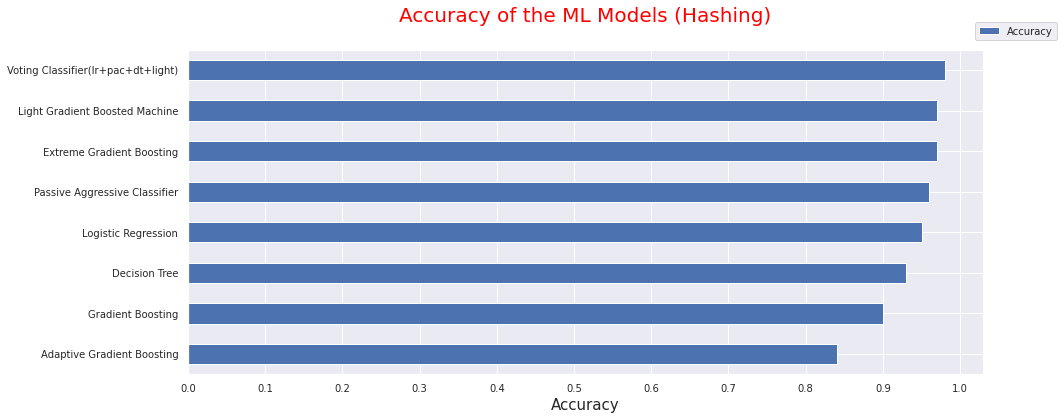

In [ ]:
acc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=15)
plt.title('Accuracy of the ML Models (Hashing)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
cm=confusion_matrix(y, lr_pred)
recall=np.diag(cm) / np.sum(cm, axis=1)
precision=np.diag(cm) / np.sum(cm, axis=0)
label_names=['fake', 'real']
df_cm=pd.DataFrame(cm, index=label_names, columns=label_names)
df_cm

,fake,real
fake,1238,61
real,365,6837


In [ ]:
fake_recall=recall[0].round(2)
fake_precision=precision[0].round(2)
fake_f1_score=(2*fake_recall*fake_precision)/(fake_recall+fake_precision)
fake_f1_score

0.8505813953488371

In [ ]:
def fake_news_performance(pred, model_name=''):
  cm=confusion_matrix(y, pred)
  recall=np.diag(cm) / np.sum(cm, axis=1)
  precision=np.diag(cm) / np.sum(cm, axis=0)
  fake_recall=recall[0].round(2)
  fake_precision=precision[0].round(2)
  fake_f1_score=(2*fake_recall*fake_precision)/(fake_recall+fake_precision)
  fake_f1_score=fake_f1_score.round(2)
  label_names=['fake', 'real']
  df_cm=pd.DataFrame(cm, index=label_names, columns=label_names)
  plt.figure(figsize=(15, 6))
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt='g')
  plt.xticks(fontsize=25)
  plt.yticks(rotation=0, fontsize=25)
  plt.title('\nConfusion Matrix for '+model_name+' (Hashing)\n', fontsize=30, color='red')
  plt.show()
    
  print('-----------------------------------------------------------------------------------------------------------------')
  print(f'\nClassification Report for:--> {model_name} (Hashing) \n{classification_report(y, pred, target_names=label_names)}')

  return fake_precision, fake_recall, fake_f1_score

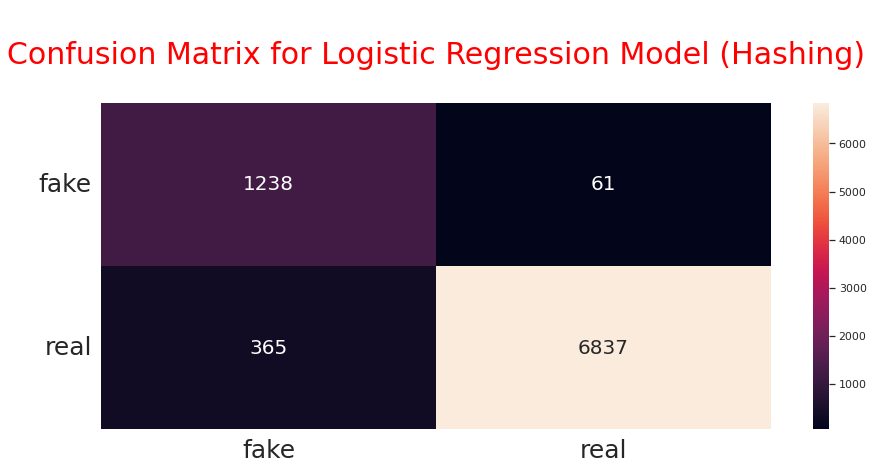

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Logistic Regression Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.77      0.95      0.85      1299
        real       0.99      0.95      0.97      7202

    accuracy                           0.95      8501
   macro avg       0.88      0.95      0.91      8501
weighted avg       0.96      0.95      0.95      8501



In [ ]:
fake_precision_lr, fake_recall_lr, fake_f1_score_lr=fake_news_performance(lr_pred, 'Logistic Regression Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Logistic Regression Model --> {fake_precision_lr, fake_recall_lr, fake_f1_score_lr}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Logistic Regression Model --> (0.77, 0.95, 0.85), respectively


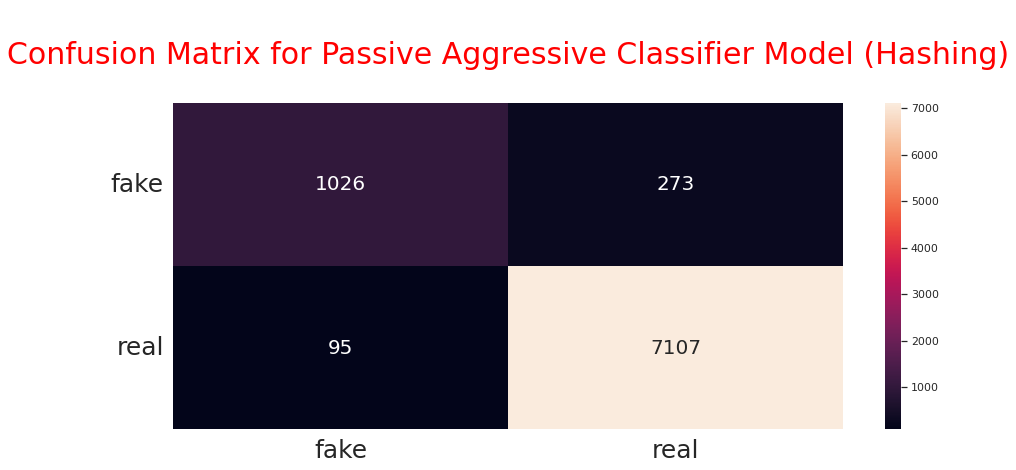

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Passive Aggressive Classifier Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.92      0.79      0.85      1299
        real       0.96      0.99      0.97      7202

    accuracy                           0.96      8501
   macro avg       0.94      0.89      0.91      8501
weighted avg       0.96      0.96      0.96      8501



In [ ]:
fake_precision_pac, fake_recall_pac, fake_f1_score_pac=fake_news_performance(pac_pred, 'Passive Aggressive Classifier Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Passive Aggressive Classifier Model --> {fake_precision_pac, fake_recall_pac, fake_f1_score_pac}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Passive Aggressive Classifier Model --> (0.92, 0.79, 0.85), respectively


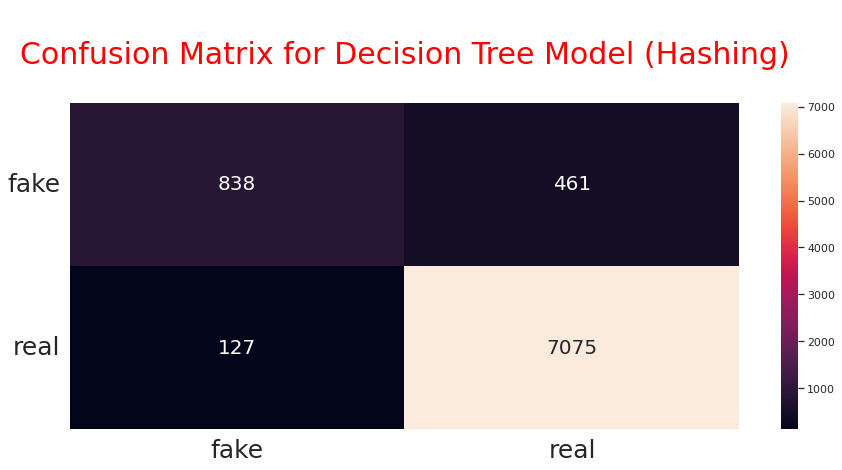

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Decision Tree Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.87      0.65      0.74      1299
        real       0.94      0.98      0.96      7202

    accuracy                           0.93      8501
   macro avg       0.90      0.81      0.85      8501
weighted avg       0.93      0.93      0.93      8501



In [ ]:
fake_precision_dt, fake_recall_dt, fake_f1_score_dt=fake_news_performance(dt_pred, 'Decision Tree Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Decision Tree Model --> {fake_precision_dt, fake_recall_dt, fake_f1_score_dt}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Decision Tree Model --> (0.87, 0.65, 0.74), respectively


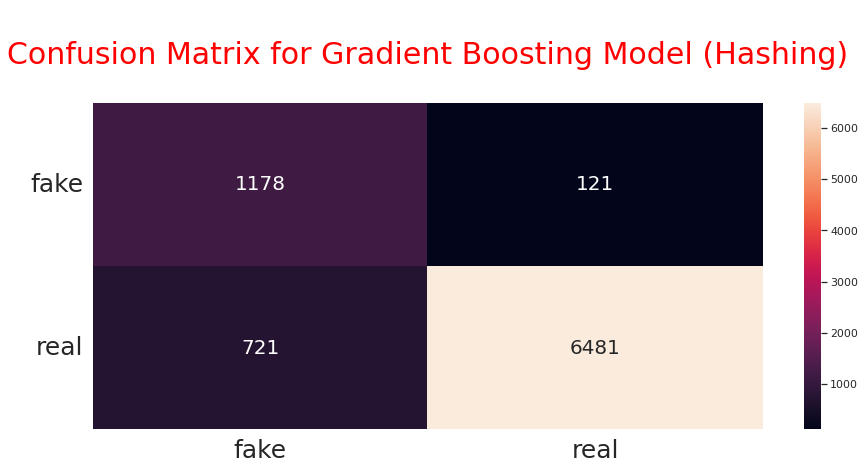

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Gradient Boosting Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.62      0.91      0.74      1299
        real       0.98      0.90      0.94      7202

    accuracy                           0.90      8501
   macro avg       0.80      0.90      0.84      8501
weighted avg       0.93      0.90      0.91      8501



In [ ]:
fake_precision_gb, fake_recall_gb, fake_f1_score_gb=fake_news_performance(gb_pred, 'Gradient Boosting Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Gradient Boosting Model --> {fake_precision_gb, fake_recall_gb, fake_f1_score_gb}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Gradient Boosting Model --> (0.62, 0.91, 0.74), respectively


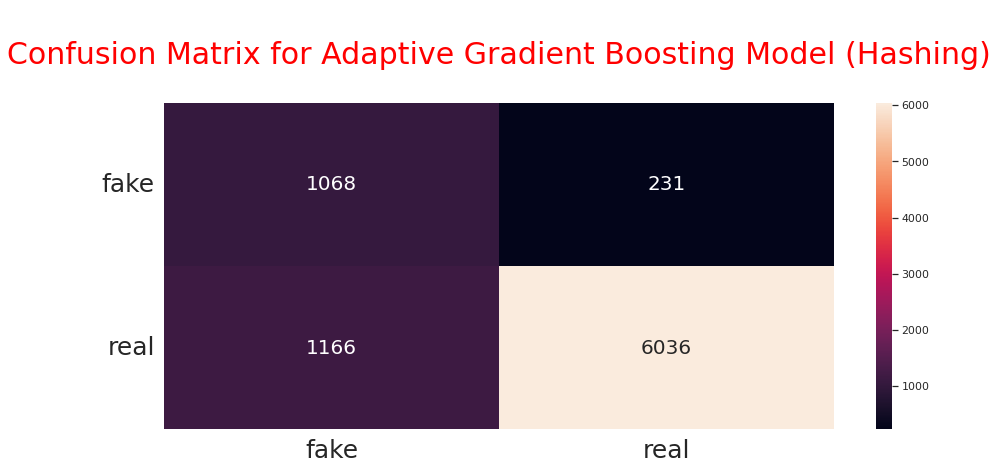

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Adaptive Gradient Boosting Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.48      0.82      0.60      1299
        real       0.96      0.84      0.90      7202

    accuracy                           0.84      8501
   macro avg       0.72      0.83      0.75      8501
weighted avg       0.89      0.84      0.85      8501



In [ ]:
fake_precision_adb, fake_recall_adb, fake_f1_score_adb=fake_news_performance(adb_pred, 'Adaptive Gradient Boosting Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Adaptive Gradient Boosting Model --> {fake_precision_adb, fake_recall_adb, fake_f1_score_adb}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Adaptive Gradient Boosting Model --> (0.48, 0.82, 0.61), respectively


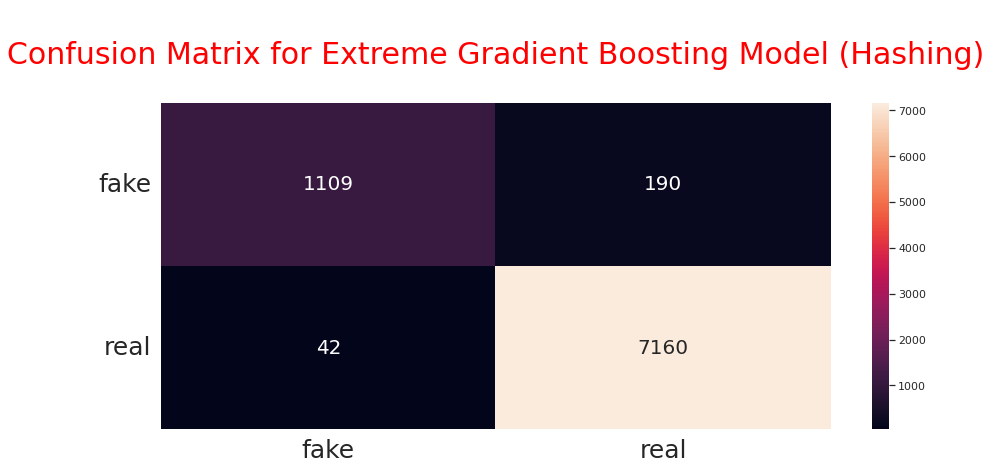

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Extreme Gradient Boosting Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.96      0.85      0.91      1299
        real       0.97      0.99      0.98      7202

    accuracy                           0.97      8501
   macro avg       0.97      0.92      0.94      8501
weighted avg       0.97      0.97      0.97      8501



In [ ]:
fake_precision_xgb, fake_recall_xgb, fake_f1_score_xgb=fake_news_performance(xgb_pred, 'Extreme Gradient Boosting Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Extreme Gradient Boosting Model --> {fake_precision_xgb, fake_recall_xgb, fake_f1_score_xgb}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Extreme Gradient Boosting Model --> (0.96, 0.85, 0.9), respectively


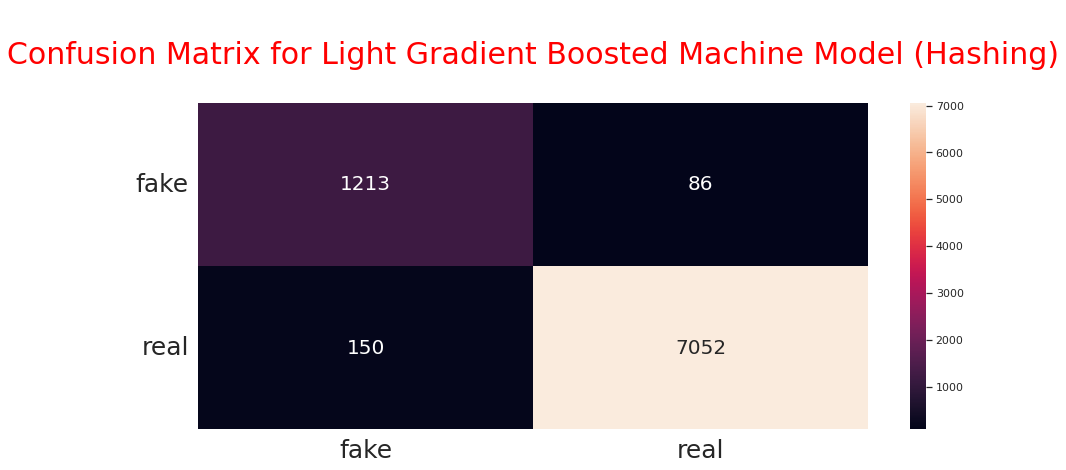

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Light Gradient Boosted Machine Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.89      0.93      0.91      1299
        real       0.99      0.98      0.98      7202

    accuracy                           0.97      8501
   macro avg       0.94      0.96      0.95      8501
weighted avg       0.97      0.97      0.97      8501



In [ ]:
fake_precision_lgbm, fake_recall_lgbm, fake_f1_score_lgbm=fake_news_performance(lgbm_pred, 'Light Gradient Boosted Machine Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Light Gradient Boosted Machine Model --> {fake_precision_lgbm, fake_recall_lgbm, fake_f1_score_lgbm}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Light Gradient Boosted Machine Model --> (0.89, 0.93, 0.91), respectively


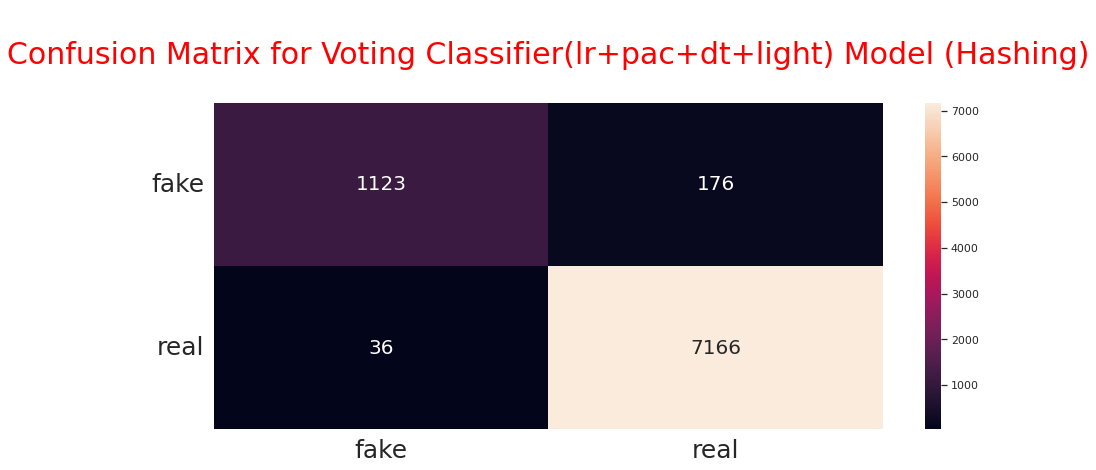

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Voting Classifier(lr+pac+dt+light) Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.97      0.86      0.91      1299
        real       0.98      1.00      0.99      7202

    accuracy                           0.98      8501
   macro avg       0.97      0.93      0.95      8501
weighted avg       0.97      0.98      0.97      8501



In [ ]:
fake_precision_voting, fake_recall_voting, fake_f1_score_voting=fake_news_performance(voting_pred, 'Voting Classifier(lr+pac+dt+light) Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Voting Classifier(lr+pac+dt+light) Model --> {fake_precision_voting, fake_recall_voting, fake_f1_score_voting}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Voting Classifier(lr+pac+dt+light) Model --> (0.97, 0.86, 0.91), respectively


In [ ]:
fake_perform={'Models Used':['Logistic Regression', 'Passive Aggressive Classifier', 'Decision Tree', 'Gradient Boosting', 'Adaptive Gradient Boosting', 'Extreme Gradient Boosting', 'Light Gradient Boosted Machine', 'Voting Classifier(lr+pac+dt+light)'],
              'Precision_fake':[fake_precision_lr, fake_precision_pac, fake_precision_dt, fake_precision_gb, fake_precision_adb, fake_precision_xgb, fake_precision_lgbm, fake_precision_voting], 
              'Recall_fake':[fake_recall_lr, fake_recall_pac, fake_recall_dt, fake_recall_gb, fake_recall_adb, fake_recall_xgb, fake_recall_lgbm, fake_recall_voting], 
              'F1-Score_fake':[fake_f1_score_lr, fake_f1_score_pac, fake_f1_score_dt, fake_f1_score_gb, fake_f1_score_adb, fake_f1_score_xgb, fake_f1_score_lgbm, fake_f1_score_voting], 
              'Overall_Accuracy':[lr_accuracy, pac_accuracy, dt_accuracy, gb_accuracy, adb_accuracy, xgb_accuracy, lgbm_accuracy, voting_accuracy]}

df_fake_perform=pd.DataFrame(fake_perform)
df_fake_perform

,Models Used,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
0,Logistic Regression,0.77,0.95,0.85,0.95
1,Passive Aggressive Classifier,0.92,0.79,0.85,0.96
2,Decision Tree,0.87,0.65,0.74,0.93
3,Gradient Boosting,0.62,0.91,0.74,0.90
4,Adaptive Gradient Boosting,0.48,0.82,0.61,0.84
5,Extreme Gradient Boosting,0.96,0.85,0.90,0.97
6,Light Gradient Boosted Machine,0.89,0.93,0.91,0.97
7,Voting Classifier(lr+pac+dt+light),0.97,0.86,0.91,0.98


In [ ]:
df_fake_perform.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/fake_news_detection_performance_hash.csv', index=False)

In [ ]:
df_fake_perform.groupby('Models Used')['Precision_fake'].sum().sort_values(ascending=False)

Models Used
Voting Classifier(lr+pac+dt+light)    0.97
Extreme Gradient Boosting             0.96
Passive Aggressive Classifier         0.92
Light Gradient Boosted Machine        0.89
Decision Tree                         0.87
Logistic Regression                   0.77
Gradient Boosting                     0.62
Adaptive Gradient Boosting            0.48
Name: Precision_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['Recall_fake'].sum().sort_values(ascending=False)

Models Used
Logistic Regression                   0.95
Light Gradient Boosted Machine        0.93
Gradient Boosting                     0.91
Voting Classifier(lr+pac+dt+light)    0.86
Extreme Gradient Boosting             0.85
Adaptive Gradient Boosting            0.82
Passive Aggressive Classifier         0.79
Decision Tree                         0.65
Name: Recall_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['F1-Score_fake'].sum().sort_values(ascending=False)

Models Used
Light Gradient Boosted Machine        0.91
Voting Classifier(lr+pac+dt+light)    0.91
Extreme Gradient Boosting             0.90
Logistic Regression                   0.85
Passive Aggressive Classifier         0.85
Decision Tree                         0.74
Gradient Boosting                     0.74
Adaptive Gradient Boosting            0.61
Name: F1-Score_fake, dtype: float64

In [ ]:
df_fake_perform.set_index('Models Used', inplace=True)
df_fake_perform.sort_values('F1-Score_fake', ascending=False, inplace=True)
df_fake_perform

,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
Models Used,,,,
Light Gradient Boosted Machine,0.89,0.93,0.91,0.97
Voting Classifier(lr+pac+dt+light),0.97,0.86,0.91,0.98
Extreme Gradient Boosting,0.96,0.85,0.90,0.97
Logistic Regression,0.77,0.95,0.85,0.95
Passive Aggressive Classifier,0.92,0.79,0.85,0.96
Decision Tree,0.87,0.65,0.74,0.93
Gradient Boosting,0.62,0.91,0.74,0.90
Adaptive Gradient Boosting,0.48,0.82,0.61,0.84


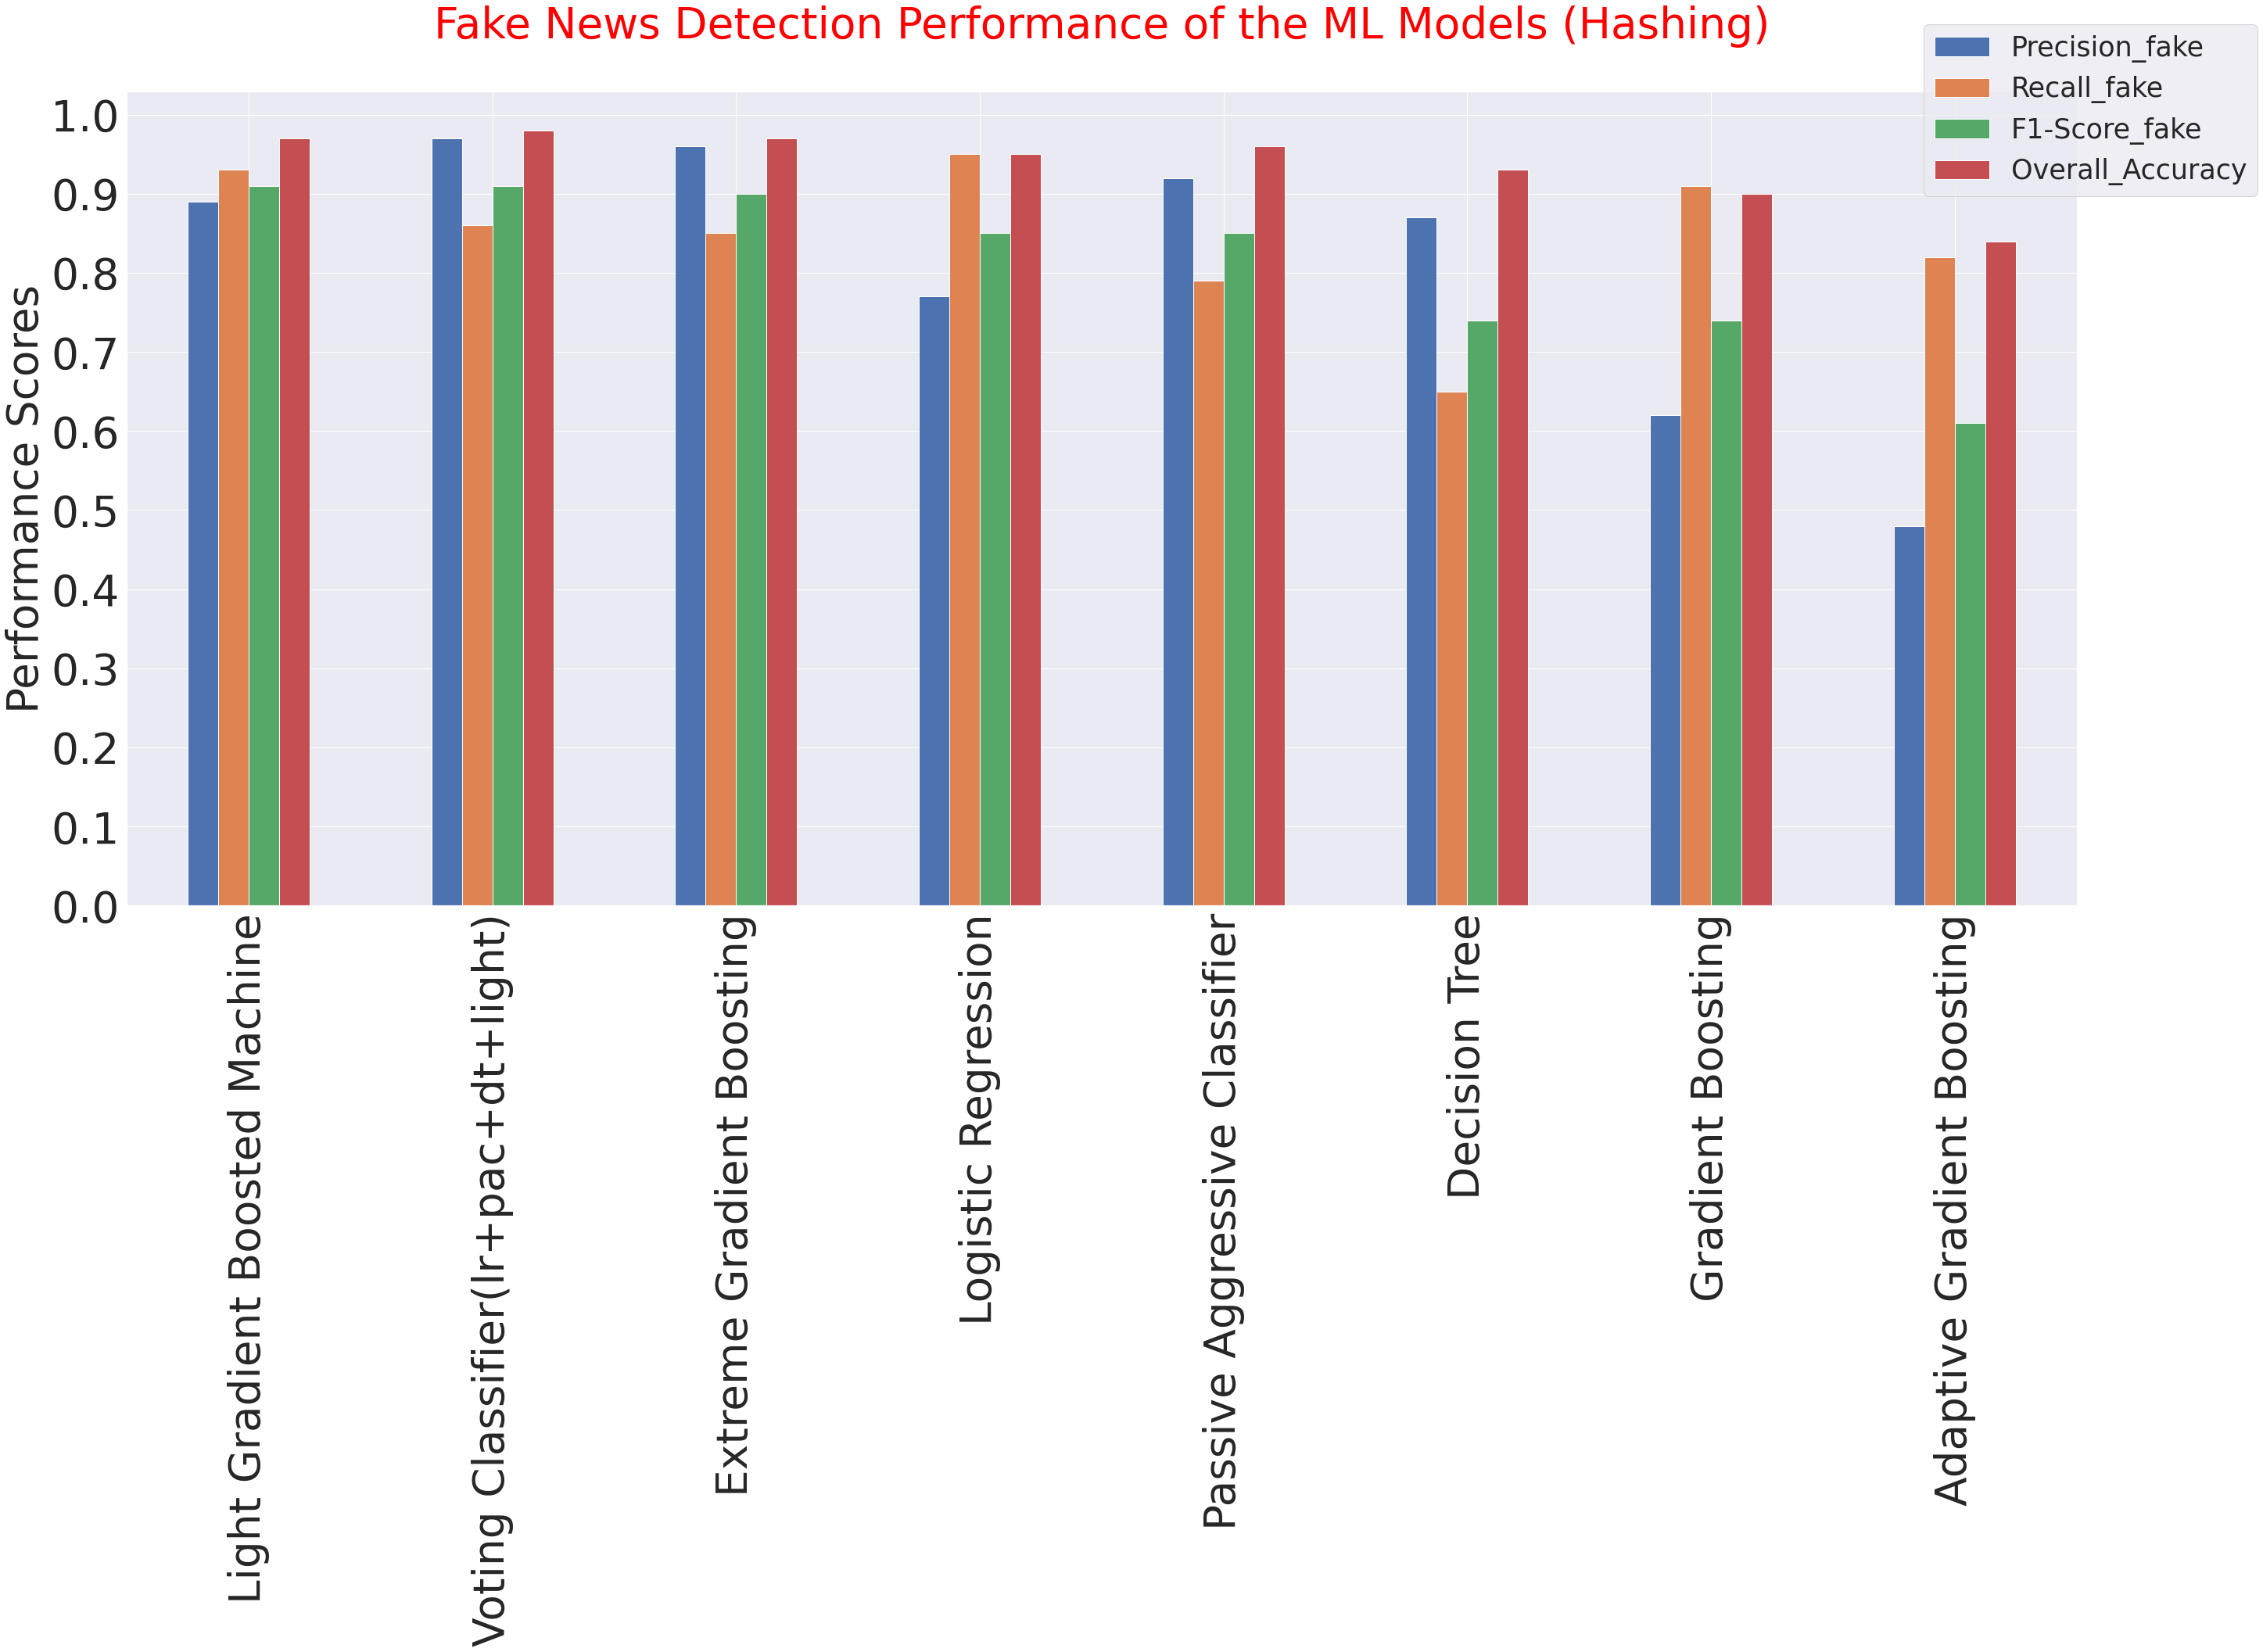

In [ ]:
df_fake_perform.plot.bar(rot=90, figsize=(40, 30));
plt.xlabel('')
plt.ylabel('Performance Scores', fontsize=55)
plt.title('Fake News Detection Performance of the ML Models (Hashing)\n', fontsize=55, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=35)
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=55)
plt.xticks(fontsize=55)
plt.tight_layout()
plt.show()

In [ ]:
fallout_lr, sensitivity_lr, thresholds_lr=roc_curve(y, lr_pred)
fallout_pac, sensitivity_pac, thresholds_pac=roc_curve(y, pac_pred)
fallout_dt, sensitivity_dt, thresholds_dt=roc_curve(y, dt_pred)
fallout_gb, sensitivity_gb, thresholds_gb=roc_curve(y, gb_pred)
fallout_adb, sensitivity_adb, thresholds_adb=roc_curve(y, adb_pred)
fallout_xgb, sensitivity_xgb, thresholds_xgb=roc_curve(y, xgb_pred)
fallout_lgbm, sensitivity_lgbm, thresholds_lgbm=roc_curve(y, lgbm_pred)
fallout_voting, sensitivity_voting, thresholds_voting=roc_curve(y, voting_pred)

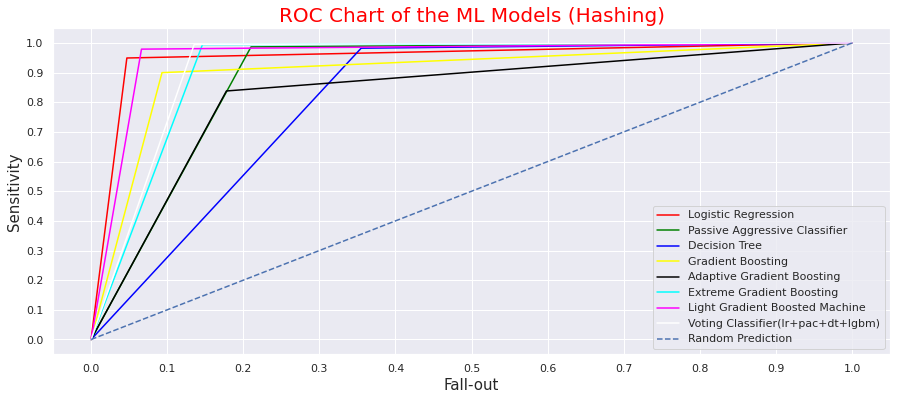

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fallout_lr, sensitivity_lr, color='red', label='%s' % 'Logistic Regression')
plt.plot(fallout_pac, sensitivity_pac, color='green', label='%s' % 'Passive Aggressive Classifier')
plt.plot(fallout_dt, sensitivity_dt, color='blue', label='%s' % 'Decision Tree')
plt.plot(fallout_gb, sensitivity_gb, color='yellow', label='%s' % 'Gradient Boosting')
plt.plot(fallout_adb, sensitivity_adb, color='black', label='%s' % 'Adaptive Gradient Boosting')
plt.plot(fallout_xgb, sensitivity_xgb, color='cyan', label='%s' % 'Extreme Gradient Boosting')
plt.plot(fallout_lgbm, sensitivity_lgbm, color='magenta', label='%s' % 'Light Gradient Boosted Machine')
plt.plot(fallout_voting, sensitivity_voting, color='white', label='%s' % 'Voting Classifier(lr+pac+dt+lgbm)')
plt.plot([0,1], [0,1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart of the ML Models (Hashing)", color='red', fontsize=20)
plt.xlabel("Fall-out", fontsize=15)
plt.ylabel("Sensitivity", fontsize=15)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.legend(loc='best')
plt.show()

In [ ]:
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y, lr_pred))
print("Passive Aggressive Classifier AUC Score: %0.2f" % roc_auc_score(y, pac_pred))
print("Decision Tree Classifier AUC Score: %0.2f" % roc_auc_score(y, dt_pred))
print("Gradient Boosting AUC Score: %0.2f" % roc_auc_score(y, gb_pred))
print(" Adaptive Gradient Boosting AUC Score: %0.2f" % roc_auc_score(y, adb_pred))
print("Extreme Gradient Boosting AUC Score: %0.2f" % roc_auc_score(y, xgb_pred))
print(" Light Gradient Boosted Machine AUC Score: %0.2f" % roc_auc_score(y, lgbm_pred))
print("Voting Classifier(lr+pac+dt+lgbm) AUC Score: %0.2f" % roc_auc_score(y, voting_pred))

Logistic Regression AUC Score: 0.95
Passive Aggressive Classifier AUC Score: 0.89
Decision Tree Classifier AUC Score: 0.81
Gradient Boosting AUC Score: 0.90
 Adaptive Gradient Boosting AUC Score: 0.83
Extreme Gradient Boosting AUC Score: 0.92
 Light Gradient Boosted Machine AUC Score: 0.96
Voting Classifier(lr+pac+dt+lgbm) AUC Score: 0.93


In [ ]:
def model_roc_auc_score(pred):
  return roc_auc_score(y, pred)

lr_auc=model_roc_auc_score(lr_pred).round(2)
pac_auc=model_roc_auc_score(pac_pred).round(2)
dt_auc=model_roc_auc_score(dt_pred).round(2)
gb_auc=model_roc_auc_score(gb_pred).round(2)
adb_auc=model_roc_auc_score(adb_pred).round(2)
xgb_auc=model_roc_auc_score(xgb_pred).round(2)
lgbm_auc=model_roc_auc_score(lgbm_pred).round(2)
voting_auc=model_roc_auc_score(voting_pred).round(2)

auc_scores={'Models Used':['Logistic Regression', 'Passive Aggressive Classifier', 'Decision Tree', 'Gradient Boosting', 'Adaptive Gradient Boosting', 'Extreme Gradient Boosting', 'Light Gradient Boosted Machine', 'Voting Classifier(lr+pac+dt+light)'],
            'AUC':[lr_auc, pac_auc, dt_auc, gb_auc, adb_auc, xgb_auc, lgbm_auc, voting_auc]}

df_auc=pd.DataFrame(auc_scores)
df_auc

,Models Used,AUC
0,Logistic Regression,0.95
1,Passive Aggressive Classifier,0.89
2,Decision Tree,0.81
3,Gradient Boosting,0.90
4,Adaptive Gradient Boosting,0.83
5,Extreme Gradient Boosting,0.92
6,Light Gradient Boosted Machine,0.96
7,Voting Classifier(lr+pac+dt+light),0.93


In [ ]:
df_auc=df_auc.sort_values('AUC')
df_auc

,Models Used,AUC
2,Decision Tree,0.81
4,Adaptive Gradient Boosting,0.83
1,Passive Aggressive Classifier,0.89
3,Gradient Boosting,0.90
5,Extreme Gradient Boosting,0.92
7,Voting Classifier(lr+pac+dt+light),0.93
0,Logistic Regression,0.95
6,Light Gradient Boosted Machine,0.96


In [ ]:
df_auc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/AUC_Scores_hash.csv', index=False)

In [ ]:
auc_df=df_auc.set_index('Models Used')
auc_df

,AUC
Models Used,
Decision Tree,0.81
Adaptive Gradient Boosting,0.83
Passive Aggressive Classifier,0.89
Gradient Boosting,0.90
Extreme Gradient Boosting,0.92
Voting Classifier(lr+pac+dt+light),0.93
Logistic Regression,0.95
Light Gradient Boosted Machine,0.96


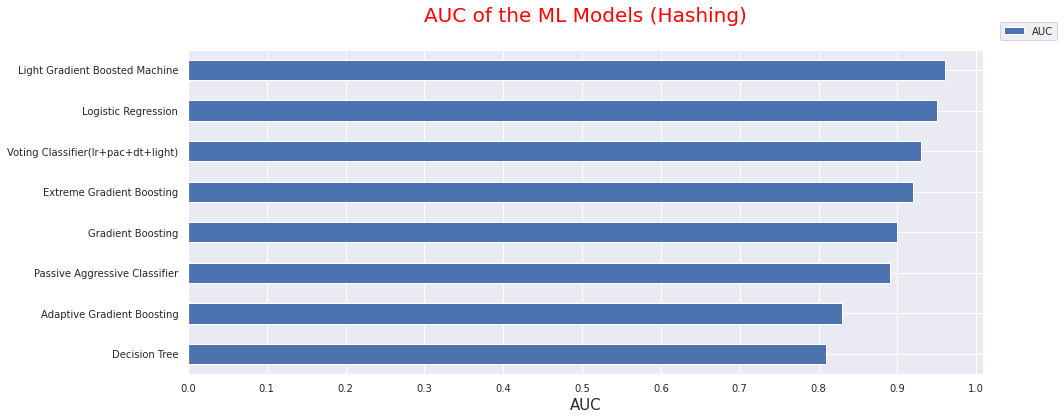

In [ ]:
auc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('AUC', fontsize=15)
plt.title('AUC of the ML Models (Hashing)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()